# Autoregressive (AR) Models
> A Summary of lecture "Time Series Analysis in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis]
- image: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Describe AR Model
- Mathematical Description of AR(1) Model
$$ R_t = \mu + \phi R_{t-1} + \epsilon_t $$
    - Since only one lagged value or right hand side, this is called,
        - AR model of order 1 or, AR(1) model
    - AR paramter $\phi$
    - For stationary, $-1 < \phi < 1$
- Interpretation of AR(1) Parameter
    - Negative $\phi$: Mean Reversion
    - Positive $\phi$: Momentum
- High order AR Models
    - AR(1)
    $$ R_t = \mu + \phi_1 R_{t-1} + \epsilon_t $$
    - AR(2)
    $$ R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \epsilon_t $$
    - AR(3)
    $$ R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \phi_3 R_{t-3} + \epsilon_t $$
    - $\cdots$

### Simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different parameter, $\phi$, using the ```arima_process``` module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive $\phi$ and a large negative $\phi$, but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with $\phi$=0.9, the array representing the AR parameters would be ```ar = np.array([1, -0.9])```

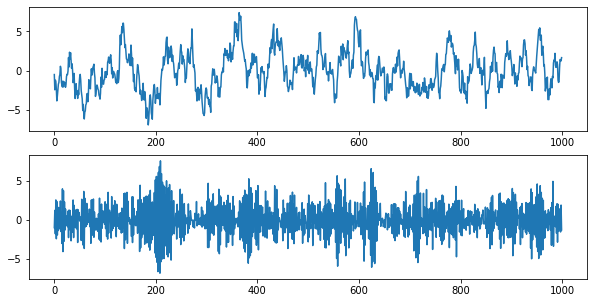

In [5]:
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);

# Plot 2: AR parameter = -0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2);

### Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, $\phi=+0.9$, the first-lag autocorrelation will be $0.9$, the second-lag will be $(0.9)^2=0.81$, the third-lag will be $(0.9)^3=0.729$, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say $-0.9$, the decay will flip signs, so the first-lag autocorrelation will be $-0.9$, the second-lag will be $(−0.9)^2=0.81$, the third-lag will be $(−0.9)^3=−0.729$, etc.

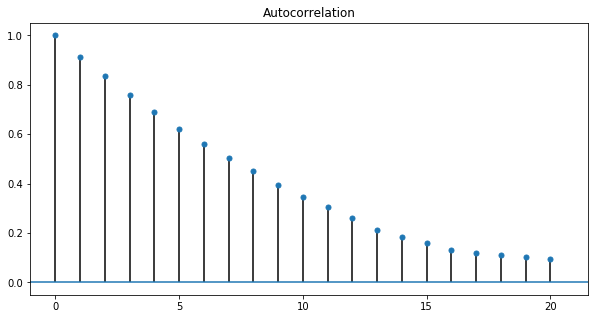

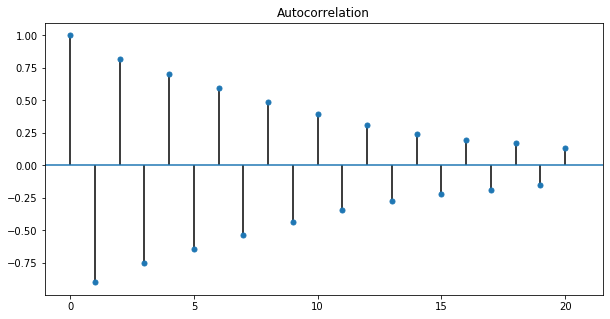

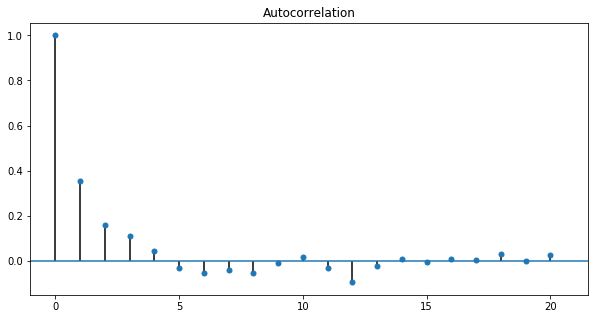

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

# AR parameter = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20);

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20);

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20);

## Estimating and Forecasting AR Model


### Estimating an AR Model
You will estimate the AR(1) parameter, $\phi$, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

In [7]:
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1418.411
Method:                       css-mle   S.D. of innovations              0.999
Date:                Mon, 08 Jun 2020   AIC                           2842.822
Time:                        08:48:50   BIC                           2857.545
Sample:                             0   HQIC                          2848.418
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0347      0.351     -0.099      0.921      -0.723       0.654
ar.L1.y        0.9110      0.013     70.464      0.000       0.886       0.936
                                    Roots           

### Forecasting with an AR Model
In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the ```predict()``` method if you want the forecasts in the form of a series of data, or using the ```plot_predict()``` method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

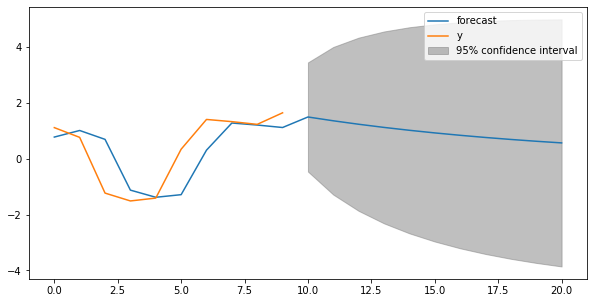

In [8]:
# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1, 0))
res = mod.fit()
res.plot_predict(start=990, end=1010);

### Let's Forecast Interest Rates
You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called ```interest_rate_data```. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

- Preprocess

In [13]:
bonds = pd.read_csv('./dataset/daily_rates.csv', index_col=0)
bonds.index = pd.to_datetime(bonds.index, format="%Y-%m-%d")
bonds.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [14]:
interest_rate_data = bonds.resample(rule='A').last()
interest_rate_data.head()

,US10Y
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


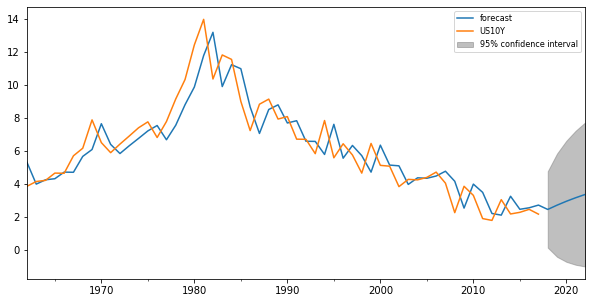

In [15]:
# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1, 0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end='2022');
plt.legend(fontsize=8);

### Compare AR Model with Random Walk
Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

- Preprocess

In [16]:
simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482])

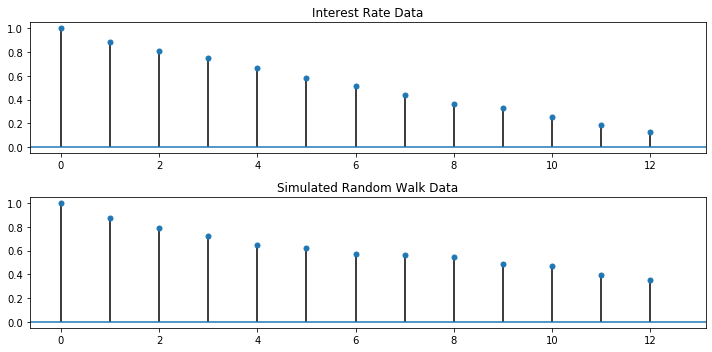

In [22]:
# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2, 1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0]);

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1]);

# Label axes
axes[0].set_title("Interest Rate Data");
axes[1].set_title("Simulated Random Walk Data");

plt.tight_layout()

## Choosing the Right Model
- Identifying the Order of an AR Model
    - The order of an AR(p) model will usually be unknown
    - Two techniques to determine order
        - Partial Autocorrelation Funciton
        - Information criteria
- Partial Autocorrelation Function (PACF)
$$ \begin{aligned} R_t &= \phi_{0,1} + \color{red}{\phi_{1,1}} R_{t-1} + \epsilon_{1t} \\ 
R_t &= \phi_{0,2} + \phi_{1,2} R_{t-1} + \color{red}{\phi_{2,2}} R_{t-2} + \epsilon_{2t} \\
R_t &= \phi_{0,3} + \phi_{1,3} R_{t-1} + \phi_{2,3} R_{t-2} + \color{red}{\phi_{3,3}} R_{t-3} + \epsilon_{3t} \\
R_t &= \phi_{0,4} + \phi_{1,4} R_{t-1} + \phi_{2,4} R_{t-2} + \phi_{3,4} R_{t-3} + \color{red}{\phi_{4,4}} R_{t-4} + \epsilon_{4t} \\
\end{aligned} $$
- Information Criteria
    - Information criteria: adjusts goodness-of-fit for number of parameters
    - Two popular adjusted goodness-of-fit measures
        - AIC ([Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion))
        - BIC ([Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion))

### Estimate Order of Model: PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

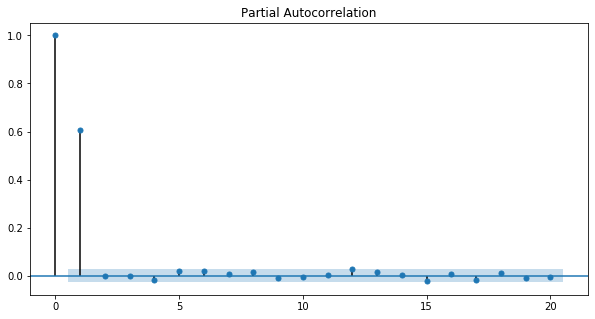

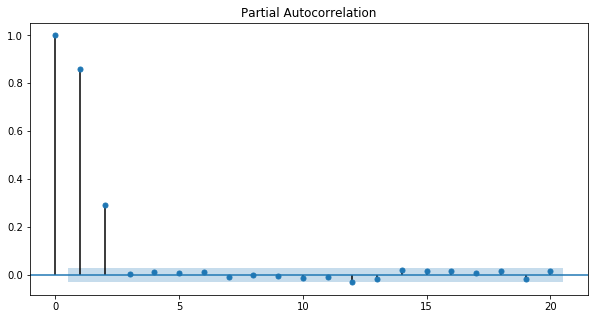

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20);

# simulated AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20);

### Estimate Order of Model: Information Criteria
Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.



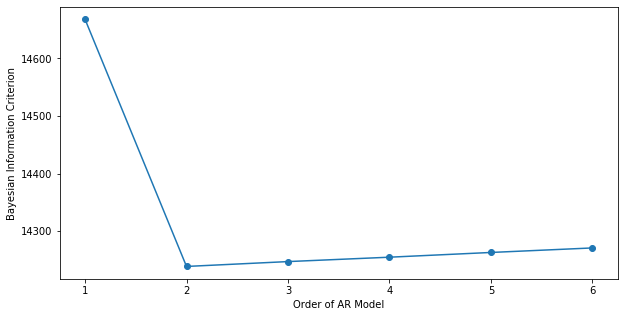

In [26]:
# Fit the data to an AR(p) for p=0,...,6, and save the BIC
BIC = np.zeros(7)

for p in range(7):
    mod = ARMA(simulated_data_2, order=(p, 0))
    res = mod.fit()
    # Save BIC for AR(p)
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1, 7), BIC[1:7], marker='o');
plt.xlabel('Order of AR Model');
plt.ylabel('Bayesian Information Criterion');